In [4]:
import numpy as np
import matplotlib.pyplot as plt

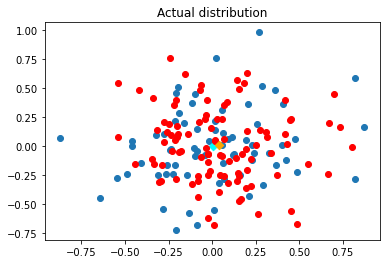

In [71]:
# Generating synthetic data


mu = 0.001    #Change this to manipulate distance between distributions generated.
numA = 70
numB = 100

sigma = 0.1


A = np.zeros((numA,2))
B = np.zeros((numB,2)) 
for i in range(numA):
    a = np.random.multivariate_normal(np.array([-mu, -mu]), np.array([[sigma, 0],[0, sigma]]))
    
    A[i][0] = a[0]
    A[i][1] = a[1]

for i in range(numB):
    b = np.random.multivariate_normal(np.array([mu, mu]), np.array([[sigma, 0],[0, sigma]])) 
    
    B[i][0] = b[0]
    B[i][1] = b[1]
    

plt.scatter(A[:,0],A[:,1])
plt.scatter(np.mean(A, 0)[0], np.mean(A, 0)[1], marker="D", color = "cyan")
plt.scatter(B[:,0],B[:,1], color = "red")
plt.scatter(np.mean(B, 0)[0], np.mean(B, 0)[1], marker="D", color = "orange")
plt.title("Actual distribution")


# Concatenating and shuffling
X = np.concatenate((A, B))
np.random.shuffle(X)

In [6]:
B

array([[0.41688798, 0.40018394],
       [0.44784259, 0.66513174],
       [0.62451358, 0.63517605],
       [0.43001915, 0.60370912],
       [0.40250504, 0.5470367 ],
       [0.58112801, 0.50175286],
       [0.42936716, 0.44379801],
       [0.47407959, 0.39922704],
       [0.32490352, 0.52731075],
       [0.68626296, 0.54072768],
       [0.38953249, 0.44803845],
       [0.50380114, 0.54550299],
       [0.43732118, 0.31674941],
       [0.60485413, 0.40210294],
       [0.46290505, 0.5472715 ],
       [0.45361546, 0.65347269],
       [0.45959534, 0.47222741],
       [0.54466682, 0.38034379],
       [0.52729508, 0.50574557],
       [0.60988996, 0.16200752],
       [0.44374635, 0.42617627],
       [0.49570925, 0.44053191],
       [0.6268045 , 0.25639547],
       [0.78057659, 0.72038222],
       [0.45864886, 0.55230625]])

Interation number #1
Interation number #2
Interation number #3
Interation number #4
Interation number #5
W0 = 0.2874743276633967
W1 = 0.33466231868957397


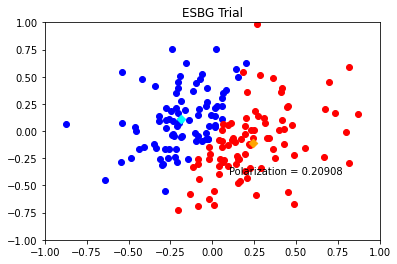

In [73]:
# ESBG trial 1: Ignoring reassignments at random.

# numIterations = 20
niter = 0
centroidConvergenceMinimum = 0.00000000005
N = X.shape[0]
currentGroup = np.zeros(N, int)
centroid0 = np.array([0, 0])
centroid1 = np.array([0, 0])


oldCentroid0 = np.array([1, 1])
oldCentroid1 = np.array([1, 1])

# Defining a variable to help make sure reassignment occurs without disbalancing the group sizes
toReassignTo = -np.ones(N, int) # 0 and 1 refer to groups 0 and 1. -1 means no reassignment needed.
nearestGroup = -np.ones(N, int)
distanceFromNearestCentroid = np.zeros(N)

# Initialization: Randomly assign half the members to group 1
randomHalf = np.random.choice(range(N), int(N/2), replace = False)
for i in randomHalf:
    currentGroup[i] = 1

# compute centroids of each group as mean across all dimensions of points in that group. 
centroid0 = np.mean(X[np.where(currentGroup == 0)], 0) 
centroid1 = np.mean(X[np.where(currentGroup == 1)], 0)



# Loop until centroids converge
while(np.linalg.norm(centroid0 - oldCentroid0)
      + np.linalg.norm(centroid1 - oldCentroid1) > centroidConvergenceMinimum):
# for t in range(numIterations):   #alternately, for loop to help debugging

    # compute centroids of each group as mean across all dimensions of points in that group. 
    centroid0 = np.mean(X[np.where(currentGroup == 0)], 0) 
    centroid1 = np.mean(X[np.where(currentGroup == 1)], 0)
    
    
    ## AIM: REASSIGN INDIVIDUALS TO THE NEAREST CENTROID WHILE KEEPING GROUP SIZES EQUAL
    # We will do this by pairing off reassignments in opposite directions - any reassignment
    # to group 1 will necessarily accompany a reassignment of anther to group 0 and vice versa.
    
    # Iterating over individuals to check reassignment requirements
    for i in range(N):
      
        # Creating an array which simply maps each individual to the group with nearest centroid
        if(np.linalg.norm(X[i, :] - centroid0) < np.linalg.norm(X[i, :] - centroid1)):
            nearestGroup[i] = 0
            distanceFromNearestCentroid[i] = np.linalg.norm(X[i, :] - centroid0)
        else:
            nearestGroup[i] = 1
            distanceFromNearestCentroid[i] = np.linalg.norm(X[i, :] - centroid1)
        
        # Now check whether reassignment is necessary for the indivudal
        if(nearestGroup[i] == currentGroup[i]):
            toReassignTo[i] = -1          # Reassignment unnecessary
        else:
            toReassignTo[i] = nearestGroup[i]
        
    # Now, only reassign if you can find a partner to go in the other direction
    howManyReassignmentPairs = np.minimum(np.size(np.where(toReassignTo == 0)), 
                                          np.size(np.where(toReassignTo == 1)))
    reassignmentPairs = -np.ones((howManyReassignmentPairs, 2), int)   # dim = 2
    
    ## HOW DO YOU SELECT WHICH ONES GET REASSIGNED?
    # Strategy 1: Select for reassignment pairing those most deserving of it. (as per paper?)
    # Note - the following logic is wrong. it should not be sorted by distance to nearest centroid
    #       but the larger cluster's points should be sorted by distance to OTHER centroid.
    #       would take significant rewriting of logic to implement, and at this point Idk if its 
    #       important. In fact I think the polarization metric must ideally be robust to this change.
    
#     reassignmentTo0 = np.where(toReassignTo == 0)[0]
#     reassignmentTo1 = np.where(toReassignTo == 1)[0]

#     distance_reassignmentTo0 = distanceFromNearestCentroid[reassignmentTo0]
#     distance_reassignmentTo1 = distanceFromNearestCentroid[reassignmentTo1]
    
#     sortedReassignmentTo0 = reassignmentTo0[np.argsort(distance_reassignmentTo0)]
#     sortedReassignmentTo1 = reassignmentTo1[np.argsort(distance_reassignmentTo1)]
    
#     sortedByDistance = np.array(range(N))[np.argsort(distanceFromNearestCentroid)]

    
    
    
#     reassignmentPairs[:, 0] = sortedReassignmentTo0[0:howManyReassignmentPairs]
#     reassignmentPairs[:, 1] = sortedReassignmentTo1[0:howManyReassignmentPairs]


    # Strategy 2: Picking at random from those eligible
    reassignmentPairs[:, 0] = np.random.choice(np.where(toReassignTo == 0)[0], 
                                               howManyReassignmentPairs, 
                                               replace = False)
    reassignmentPairs[:, 1] = np.random.choice(np.where(toReassignTo == 1)[0], 
                                               howManyReassignmentPairs,
                                               replace = False)
    
    for i in range(np.shape(reassignmentPairs)[0]):
        currentGroup[reassignmentPairs[i, 0]] = toReassignTo[reassignmentPairs[i, 0]]
        currentGroup[reassignmentPairs[i, 1]] = toReassignTo[reassignmentPairs[i, 1]]
    
    
    # Compute centroids of each group as mean across all dimensions of points in that group.  
    oldCentroid0 = centroid0
    oldCentroid1 = centroid1
    
    centroid0 = np.mean(X[np.where(currentGroup == 0)], 0) 
    centroid1 = np.mean(X[np.where(currentGroup == 1)], 0)
    niter = niter + 1
    print("Interation number #" + str(niter) + " is done.")    
        
             
    
    
## COMPUTING POLARIZATION:
group0 = X[np.where(currentGroup == 0)]
group1 = X[np.where(currentGroup == 1)]

# Within Group Heterogeneity = mean Euclidean distance from centroid for each cluster point
w0 = np.mean((np.linalg.norm(X[np.where(currentGroup == 0)] - centroid0, axis = 1)))
w1 = np.mean((np.linalg.norm(X[np.where(currentGroup == 1)] - centroid1, axis = 1)))

# Between Group Heterogeneity = distance between centroids
b = np.linalg.norm(centroid0 - centroid1)

Polarization = b/(w0 + w1 + 1)
Polarization = Polarization/(np.sqrt(2))   #Normalize by theoretical maximum distance

# Plotting
plt.scatter(X[np.where(currentGroup == 0)][:, 0], X[np.where(currentGroup == 0)][:, 1], 
            color = "blue")
plt.scatter(centroid0[0], centroid0[1], marker="D", color = "cyan")
plt.scatter(X[np.where(currentGroup == 1)][:, 0], X[np.where(currentGroup == 1)][:, 1], 
            color = "red")
plt.scatter(centroid1[0], centroid1[1], marker="D", color = "orange")
plt.title("ESBG Trial")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.text(0.1, -0.4, "Polarization = " + str(round(Polarization,5)))      

print("W0 = " + str(w0))
print("W1 = " + str(w1))